# Diabetic Patients Classification with ML Model

### Data Dictionary


<table style="text-align: left;">
  <tr>
    <th>Variable</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>Pregnancies</td>
    <td>Number of times pregnant</td>
  </tr>
  <tr>
    <td>Glucose</td>
    <td>Plasma glucose concentration a 2 hours in an oral glucose tolerance test</td>
  </tr>
  <tr>
    <td>BloodPressure</td>
    <td>Diastolic blood pressure (mm Hg)</td>
  </tr>
  <tr>
    <td>SkinThickness</td>
    <td>Triceps skin fold thickness (mm)</td>
  </tr>
  <tr>
    <td>Insulin</td>
    <td>2-Hour serum insulin (mu U/ml)</td>
  </tr>
  <tr>
    <td>BMI</td>
    <td>Body mass index (weight in kg/(height in m)^2)</td>
  </tr>
  <tr>
    <td>DiabetesPedigreeFunction</td>
    <td>Diabetes pedigree function</td>
  </tr>
  <tr>
    <td>Age</td>
    <td>Age (years)</td>
  </tr>
  <tr>
    <td>Outcome</td>
    <td>Class variable (0 or 1) 268 of 768 are 1, the others are 0</td>
  </tr>
</table>


### Libraries

In [1]:
#!pip install chart_studio

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 
#Libraries for ML
from sklearn.preprocessing import StandardScaler #Standardization
from sklearn.model_selection import train_test_split, GridSearchCV #GridSearchCV: KNN
from sklearn.metrics import accuracy_score ,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier,LocalOutlierFactor
from sklearn.decomposition import PCA

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt

import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import itertools
plt.style.use('fivethirtyeight')
import seaborn as sns
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

### Data read and examine

In [3]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
positive = data[data.Outcome == 1]
negative = data[data.Outcome == 0]

#### Basic visualization

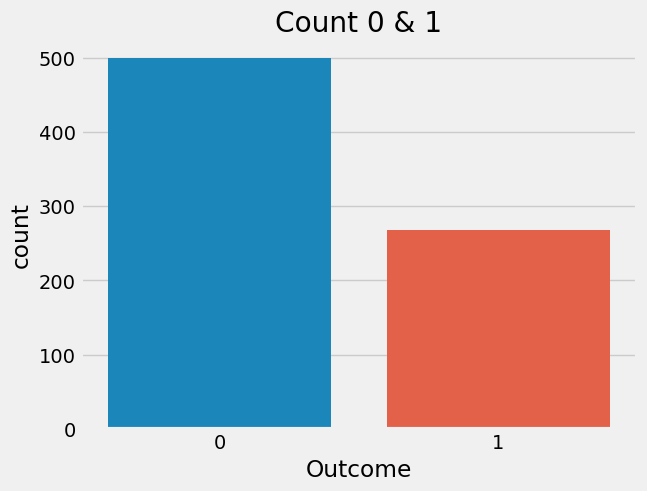

In [5]:
sns.countplot(x='Outcome',data=data)
plt.title("Count 0 & 1")
plt.show()

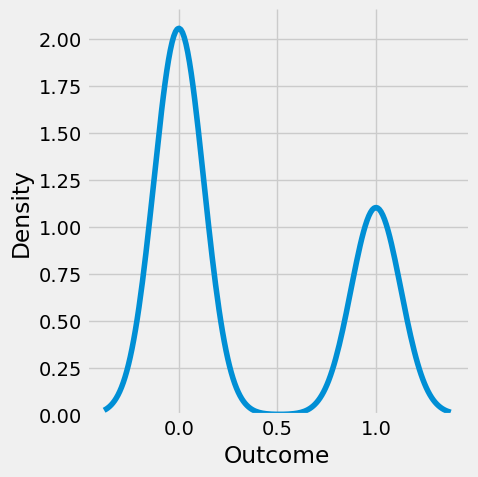

In [6]:
sns.displot(data=data, x = 'Outcome',kind = 'kde')
plt.show()

### Exploratory Data Analysis (EDA)

In [7]:
print('Data Shape',data.shape)
print(data.info()) 
describe = data.describe()
describe.T

Data Shape (768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


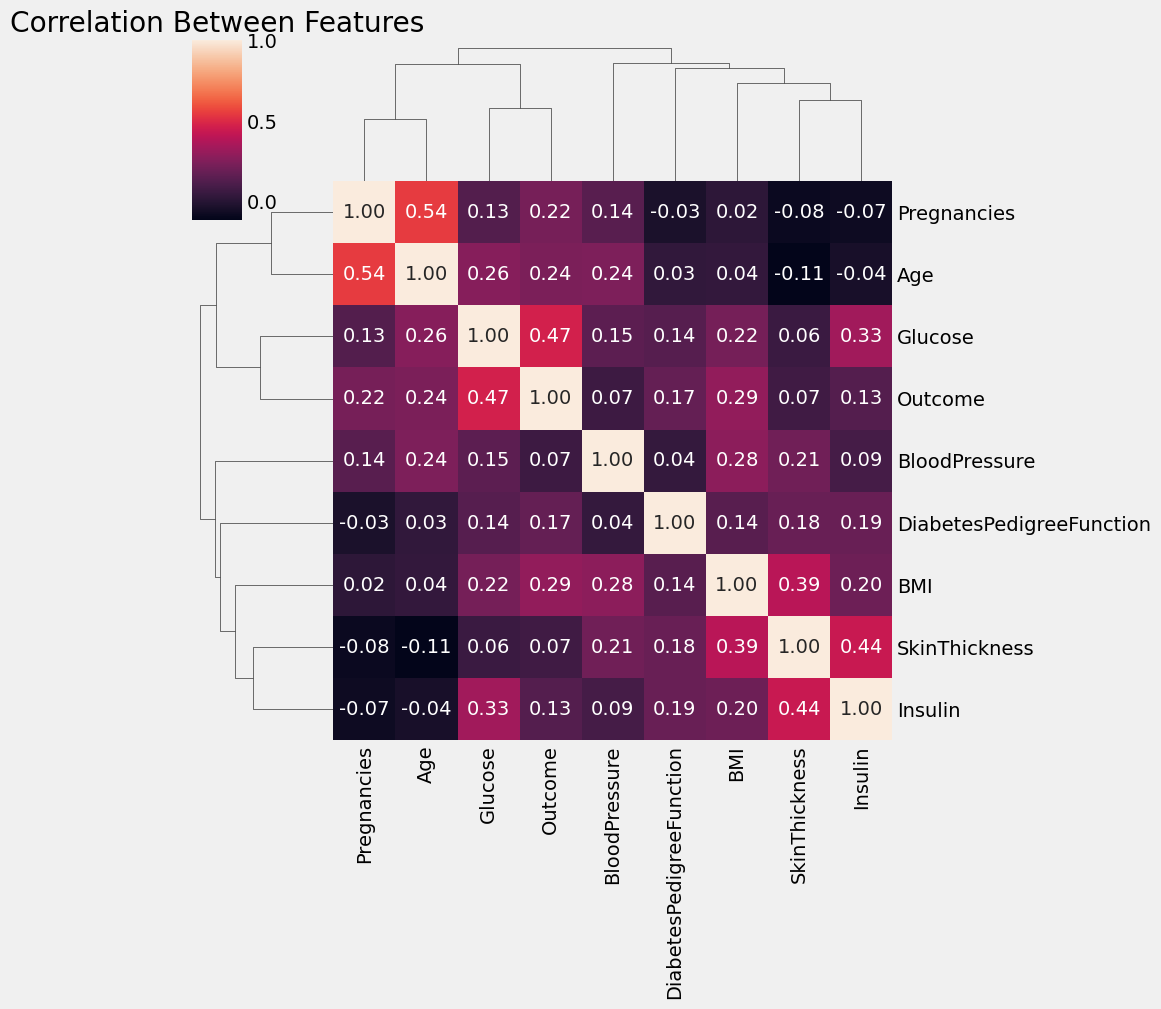

In [8]:
corr_data = data.corr() 
sns.clustermap(corr_data,annot= True,fmt = '.2f')
plt.title('Correlation Between Features')
plt.show();

### Feature Visualization with Box plot [Before Standardization]

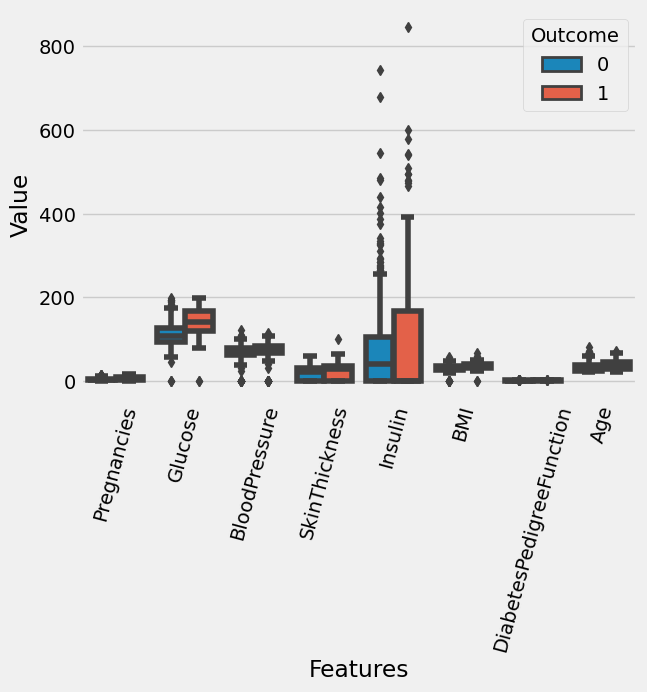

In [9]:
data_melted = pd.melt(data,id_vars='Outcome',
                      var_name='Features',
                      value_name='Value')

plt.figure()
sns.boxplot(x='Features',y='Value',hue='Outcome',data=data_melted)
plt.xticks(rotation=75)
plt.show()

### Analysis of Diabetic Cases

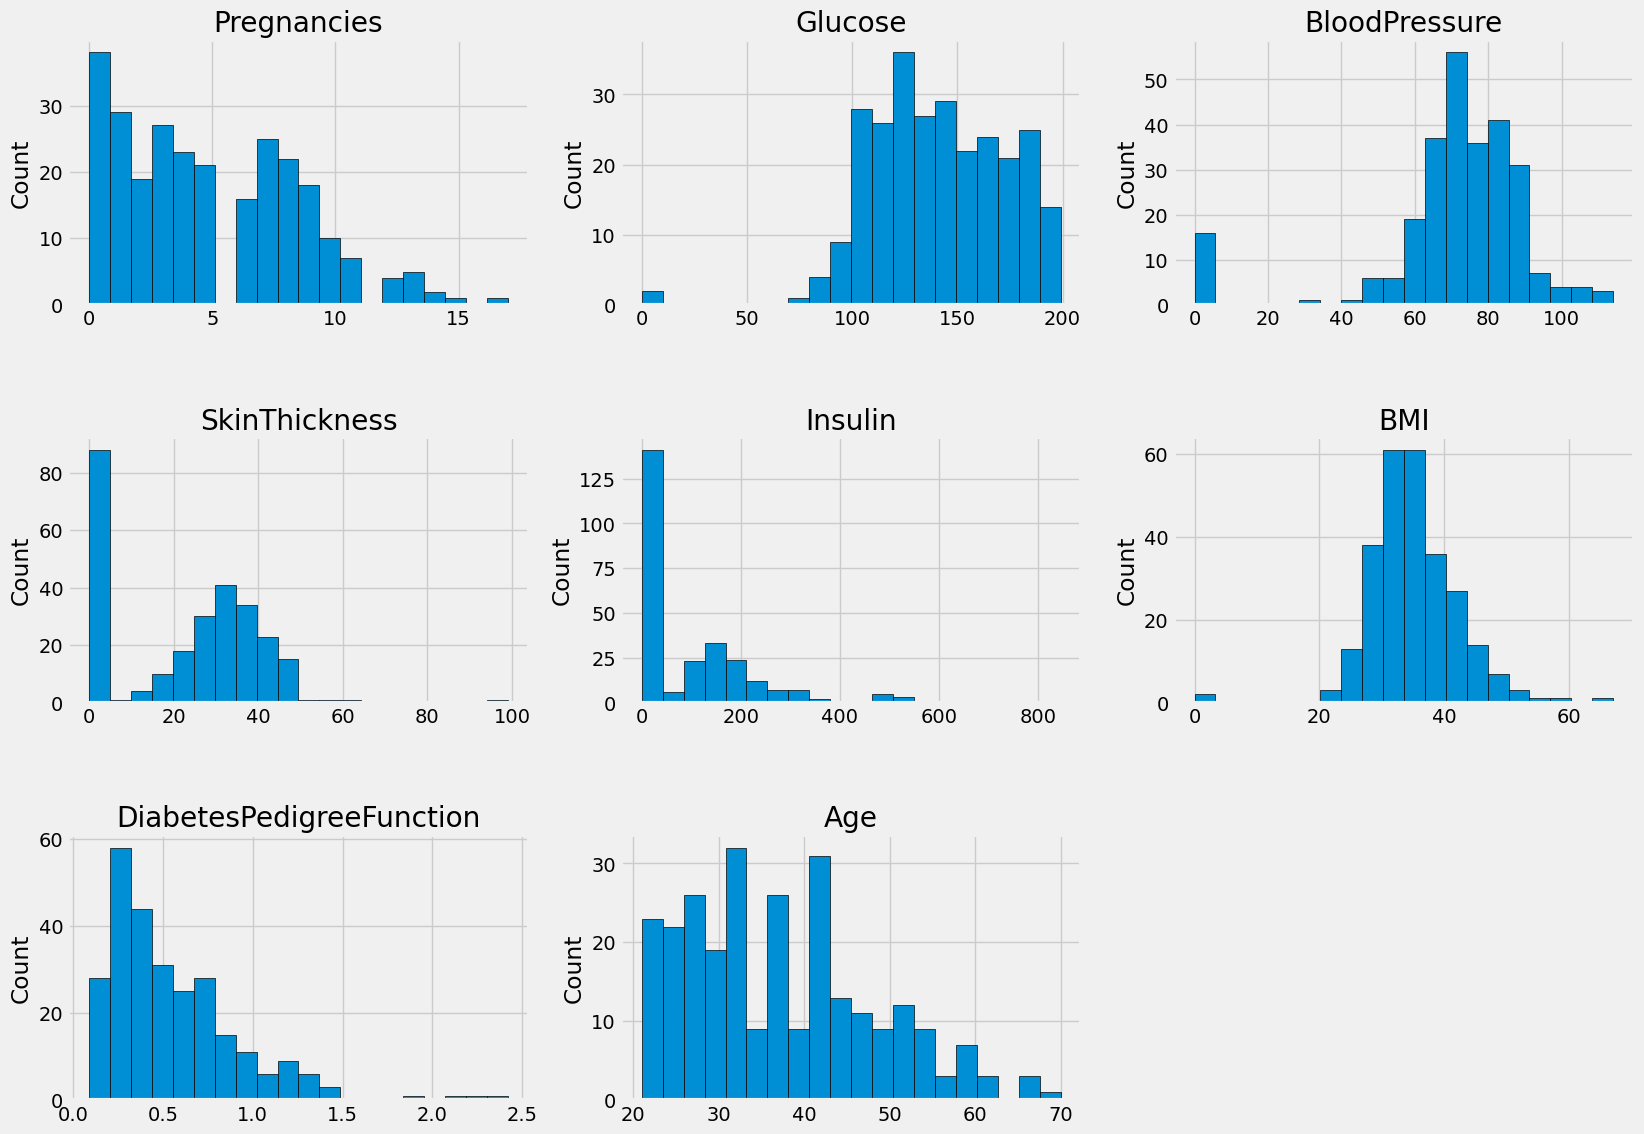

In [10]:
#General Analysis

data1 = data[data["Outcome"]==1]
columns = data.columns[:8]
plt.subplots(figsize=(18,18))
length =len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot(int((length/2)),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    plt.ylabel("Count")
    data1[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

### Analysis of Non-Diabetic Cases

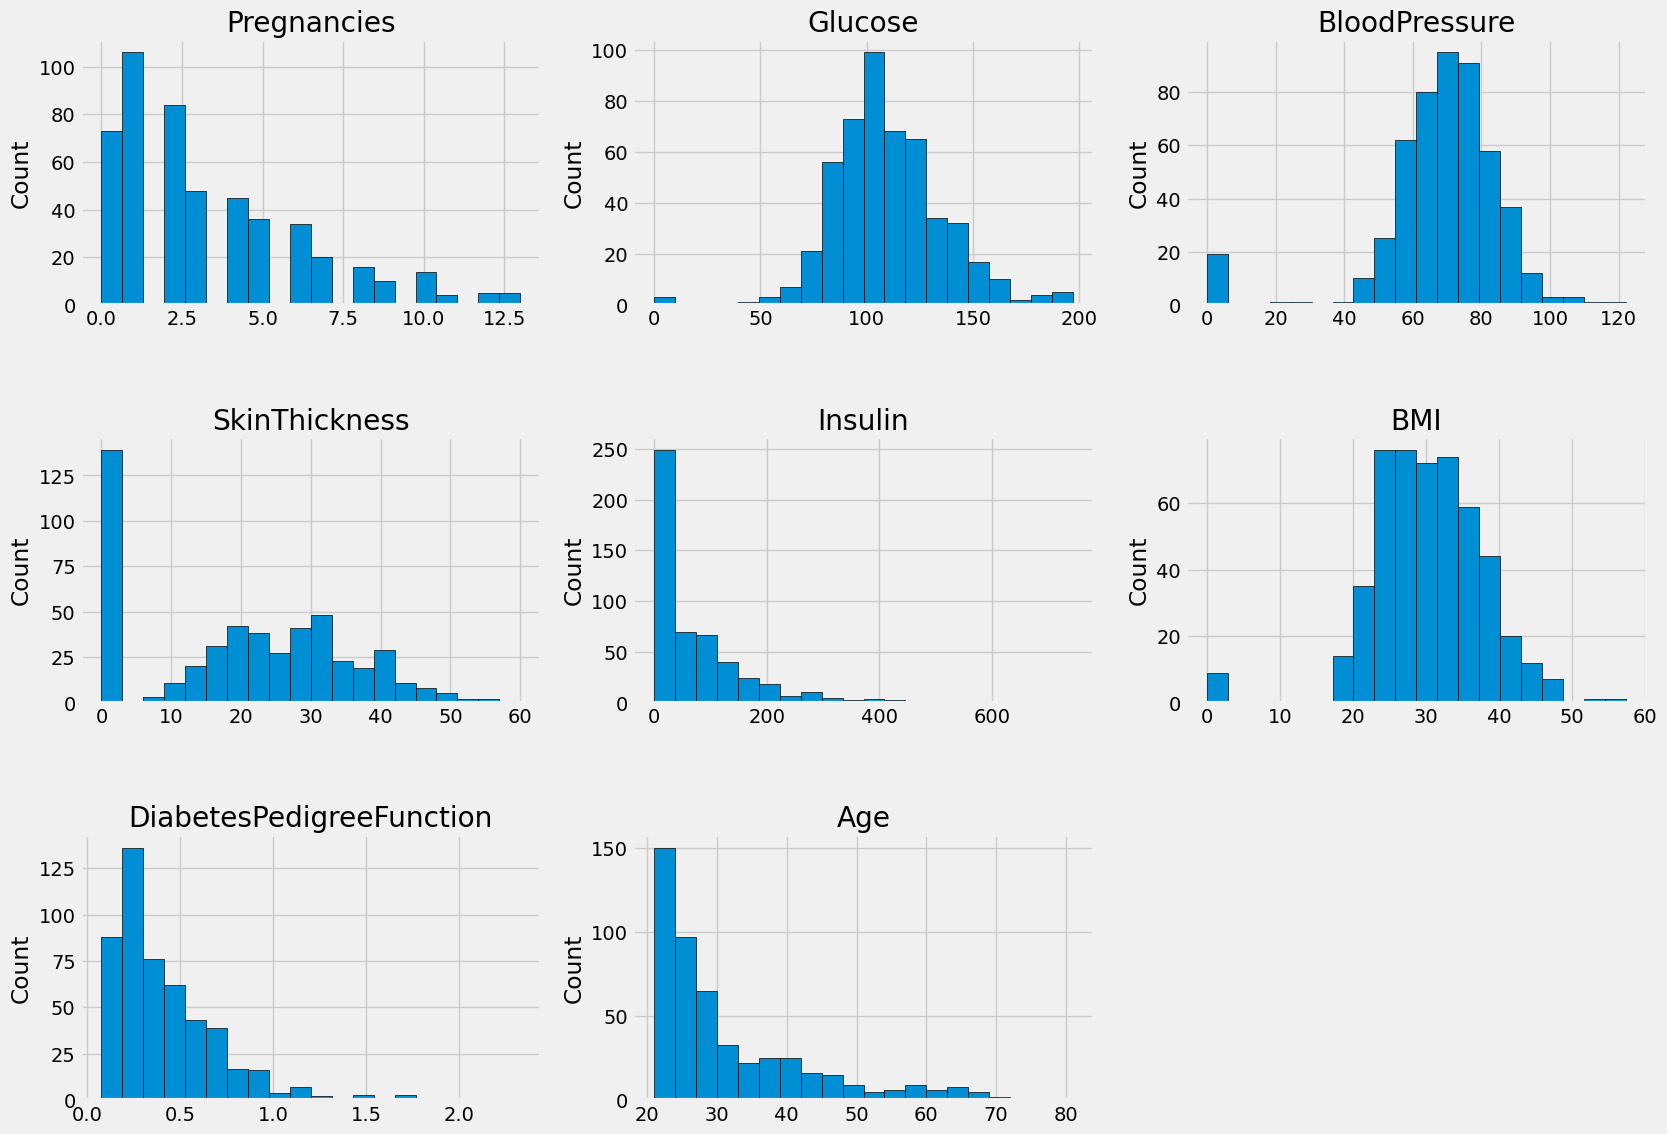

In [11]:
#General Analysis

data1 = data[data["Outcome"]==0]
columns = data.columns[:8]
plt.subplots(figsize=(18,18))
length =len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot(int((length/2)),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    plt.ylabel("Count")
    data1[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

### Visualization of Features

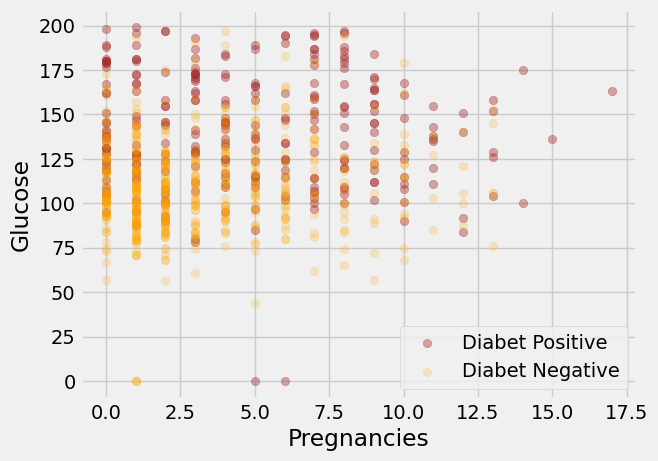

In [12]:
plt.scatter(positive.Pregnancies,positive.Glucose,color = "brown",label="Diabet Positive",alpha=0.4)
plt.scatter(negative.Pregnancies,negative.Glucose,color = "Orange",label="Diabet Negative",alpha=0.2)
plt.xlabel("Pregnancies")
plt.ylabel("Glucose")
plt.legend()
plt.show()

It appears that it is clear segregation.

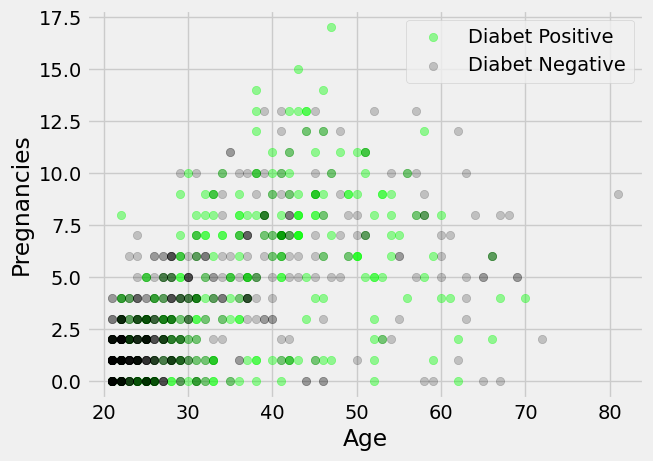

In [13]:
#Visualization, Scatter Plot

plt.scatter(positive.Age,positive.Pregnancies,color = "lime",label="Diabet Positive",alpha=0.4)
plt.scatter(negative.Age,negative.Pregnancies,color = "black",label="Diabet Negative",alpha=0.2)
plt.xlabel("Age")
plt.ylabel("Pregnancies")
plt.legend()
plt.show()

It appears that it is clear segregation.

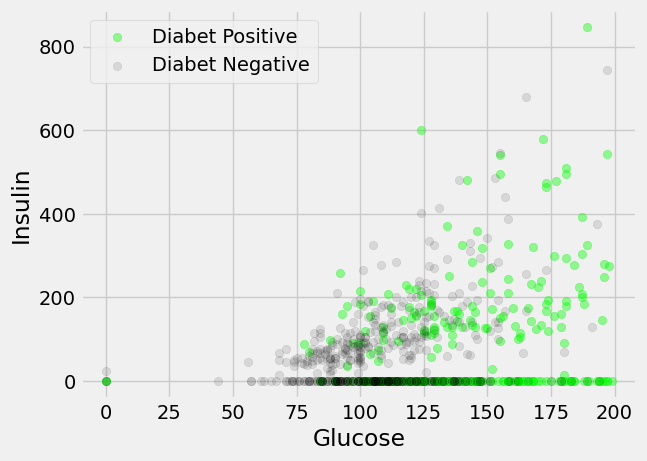

In [14]:
#Visualization, Scatter Plot

plt.scatter(positive.Glucose,positive.Insulin,color = "lime",label="Diabet Positive",alpha=0.4)
plt.scatter(negative.Glucose,negative.Insulin,color = "black",label="Diabet Negative",alpha=0.1)
plt.xlabel("Glucose")
plt.ylabel("Insulin")
plt.legend()
plt.show()

It appears that it is clear segregation.

### Outlier Detection

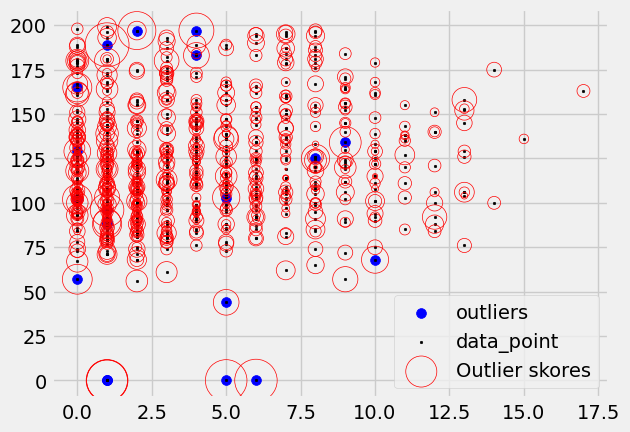

In [15]:
x = data.drop(['Outcome'],axis=1) 
y = data.Outcome
columns = x.columns.tolist()

clf = LocalOutlierFactor()
y_pred = clf.fit_predict(x)

x_score = clf.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score['score'] = x_score

threshold_outliers = -1.5
filtre = outlier_score['score'] < threshold_outliers
outlier_index = outlier_score[filtre].index.tolist()

plt.figure()
plt.scatter(x.iloc[outlier_index,0], x.iloc[outlier_index,1],color = 'blue',s=50,label='outliers')
plt.scatter(x.iloc[:,0]
            ,x.iloc[:,1],color='k',s=3,label='data_point')

radius = (x_score.max() - x_score ) / (x_score.max() - x_score.min() )
outlier_score['radius '] = radius

plt.scatter(x.iloc[:,0], x.iloc[:,1], s=1000*radius, edgecolors='r',facecolor='none',label='Outlier skores')
plt.legend()
plt.show();

#### Drop Outliers

In [16]:
x = x.drop(outlier_index) #outliers remove
y = y.drop(outlier_index).values #outliers remove

### Train Test Split & Standardization Processing

In [17]:
test_size = 0.2

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=test_size,random_state=42)

In [18]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)

x_train_df = pd.DataFrame(x_train,columns=columns)
x_train_df_describe = x_train_df.describe()
x_train_df['target'] = y_train

### Visualization with Box plot [After Standardization]

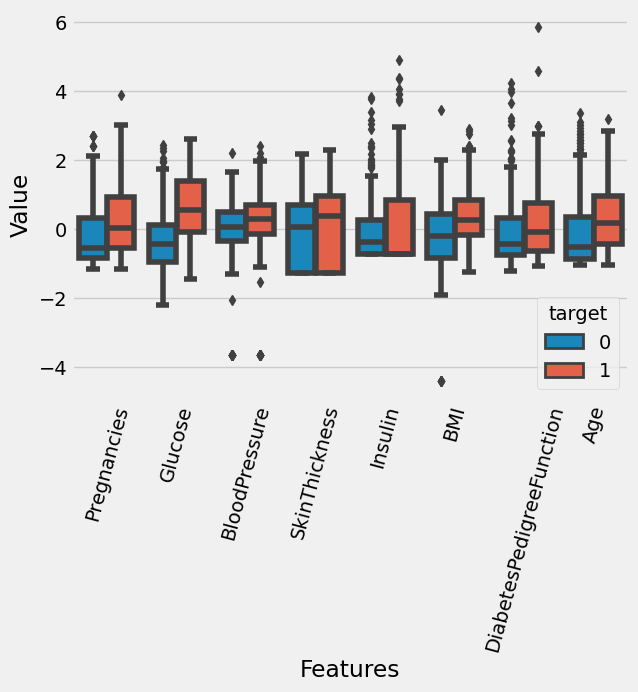

In [19]:
data_melted = pd.melt(x_train_df,id_vars='target',
                      var_name='Features',
                      value_name='Value')

plt.figure()
sns.boxplot(x='Features',y='Value',hue='target',data=data_melted)
plt.xticks(rotation=75)
plt.show()

## Machine Learning Models

#### Logistic Regression (LR)

In [20]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [21]:
#K-fold CV
from sklearn.model_selection import cross_val_score
accuraccies = cross_val_score(estimator = LR, X= x_train, y=y_train, cv=10)
print("Average Accuracies: ",np.mean(accuraccies))
print("Standart Deviation Accuracies: ",np.std(accuraccies))

Average Accuracies:  0.7502542372881356
Standart Deviation Accuracies:  0.04536417977366145


In [22]:
LR.fit(x_train,y_train)
print("Test Accuracy {}".format(LR.score(x_test,y_test))) 

LRscore = LR.score(x_test,y_test)

Test Accuracy 0.86


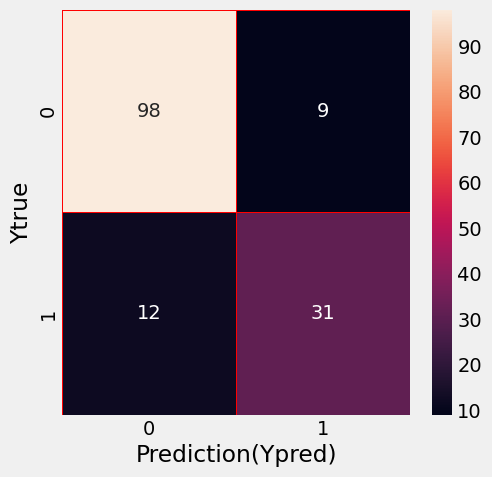

In [23]:
#Confusion Matrix

yprediciton1= LR.predict(x_test)
ytrue = y_test

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediciton1)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

#### K-nearest neighbors (KNN) & Principal Component Analysis (PCA)

In [24]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)
y_predict = knn.predict(x_test) #Test Section
cm = confusion_matrix(y_test, y_predict) #Ploting
acc = accuracy_score(y_test, y_predict) #Accuracy Score
score = knn.score(x_test, y_test)

print("Score:",score)
print("CM:",cm)
print("Basic KNN Acc:",acc)

Score: 0.7733333333333333
CM: [[101   6]
 [ 28  15]]
Basic KNN Acc: 0.7733333333333333


In [25]:
def KNN_best_parameters(x_train,x_test,y_train,y_test):
    
    k_range = list(range(1,51))
    weight_options = ['uniform','distance']
    #manhattan_distance = 1
    #euclidean_distance = 2
    distance_options = [1,2]
    print()
    param_grid = dict(n_neighbors=k_range,weights=weight_options,p=distance_options)

    knn =KNeighborsClassifier()
    grid = GridSearchCV(knn,param_grid,cv=10,scoring='accuracy')
    grid.fit(x_train, y_train)
    
    print('Best training score: {} with parametres: {}'.format(grid.best_score_,grid.best_params_))
    print()
    
    knn = KNeighborsClassifier(**grid.best_params_)
    knn.fit(x_train, y_train)
    
    y_predict_test = knn.predict(x_test)
    y_predict_train = knn.predict(x_train)

    cm_test = confusion_matrix(y_test,y_predict_test)
    cm_train = confusion_matrix(y_train,y_predict_train)

    acc_test = accuracy_score(y_test,y_predict_test)  
    acc_train = accuracy_score(y_train,y_predict_train)

    print('Test Score: {}, Train Score: {}'.format(acc_test,acc_train))
    print()
    print('CM Test:',cm_test)
    print('CM Train:',cm_train)
    
    return grid

In [26]:
grid = KNN_best_parameters(x_train,x_test,y_train,y_test)


Best training score: 0.7517796610169492 with parametres: {'n_neighbors': 39, 'p': 1, 'weights': 'distance'}

Test Score: 0.88, Train Score: 1.0

CM Test: [[102   5]
 [ 13  30]]
CM Train: [[380   0]
 [  0 217]]


In [27]:
KNNscore = grid.best_score_

Text(0.5, 1.0, 'PCA: P1 Vs P2')

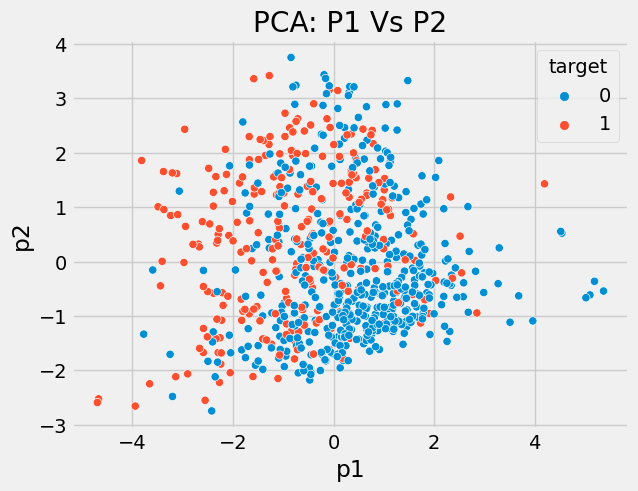

In [28]:
#%% PCA

scale = StandardScaler()
x_scaled = scaler.fit_transform(x)

pca = PCA(n_components=2)
pca.fit(x_scaled)
x_reduce_pca = pca.transform(x_scaled)
pca_data =pd.DataFrame(x_reduce_pca,columns=['p1','p2'])
pca_data['target'] = y

sns.scatterplot(x='p1',y='p2',hue='target',data=pca_data)
plt.title('PCA: P1 Vs P2')

In [29]:
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_reduce_pca,y,test_size=test_size,random_state=42)

grid_pca = KNN_best_parameters(x_train_pca, x_test_pca, y_train_pca, y_test_pca)



Best training score: 0.6901129943502825 with parametres: {'n_neighbors': 6, 'p': 1, 'weights': 'uniform'}

Test Score: 0.7733333333333333, Train Score: 0.7671691792294807

CM Test: [[95 12]
 [22 21]]
CM Train: [[354  26]
 [113 104]]


Text(0.5, 1.0, "2-Class classification (k = 6, weights = 'uniform')")

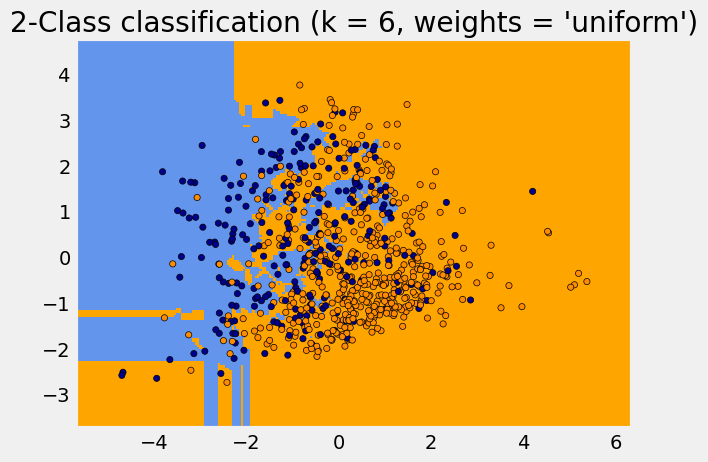

In [30]:
cmap_light = ListedColormap(['orange',  'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'darkblue'])

h = .05 # step size in the mesh
X = x_reduce_pca
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = grid_pca.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("%i-Class classification (k = %i, weights = '%s')"
          % (len(np.unique(y)),grid_pca.best_estimator_.n_neighbors, grid_pca.best_estimator_.weights))

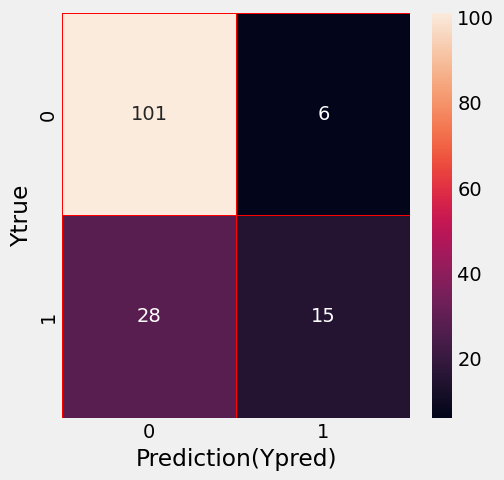

In [31]:
#Confusion Matrix

yprediciton2= knn.predict(x_test)
ytrue = y_test

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediciton2)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

#### Support Vector Machine (SVM)

In [32]:
#SVM with Sklearn

from sklearn.svm import SVC

SVM = SVC(random_state=42)

In [33]:
#K-fold CV
from sklearn.model_selection import cross_val_score
accuraccies = cross_val_score(estimator = SVM, X= x_train, y=y_train, cv=5)
print("Average Accuracies: ",np.mean(accuraccies))
print("Standart Deviation Accuracies: ",np.std(accuraccies))

Average Accuracies:  0.7387394957983193
Standart Deviation Accuracies:  0.060221832411610915


In [34]:
SVM.fit(x_train,y_train)  #learning 
#SVM Test 
print ("SVM Accuracy:", SVM.score(x_test,y_test))

SVMscore = SVM.score(x_test,y_test)

SVM Accuracy: 0.84


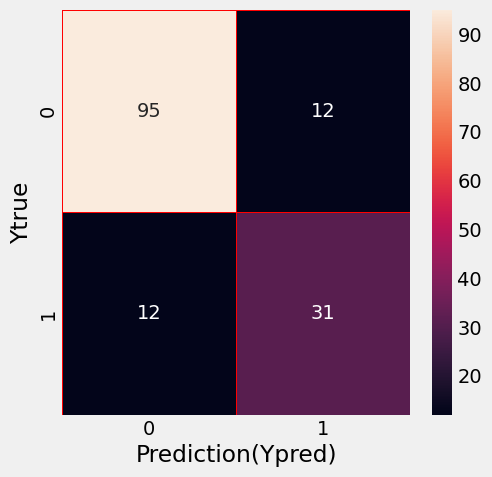

In [35]:
#Confusion Matrix

yprediciton3= SVM.predict(x_test)
ytrue = y_test

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediciton3)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

#### Decision Tree
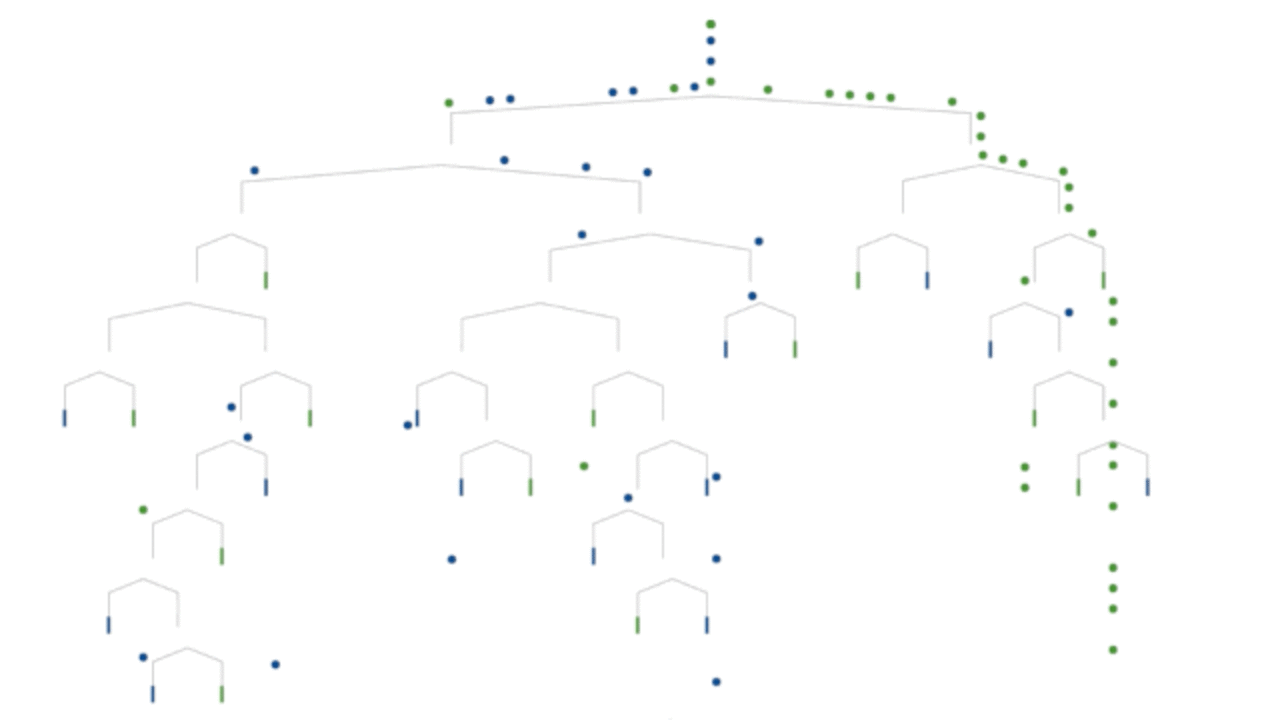

In [36]:
#Decision Tree Algorithm

from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()

In [37]:
#K-fold CV
from sklearn.model_selection import cross_val_score
accuraccies = cross_val_score(estimator = DTC, X= x_train, y=y_train, cv=55)
print("Average Accuracies: ",np.mean(accuraccies))
print("Standart Deviation Accuracies: ",np.std(accuraccies))

Average Accuracies:  0.6689256198347107
Standart Deviation Accuracies:  0.15180052264387595


In [38]:
DTC.fit(x_train,y_train) #learning
#prediciton
print("Decision Tree Score: ",DTC.score(x_test,y_test))
DTCscore = DTC.score(x_test,y_test)

Decision Tree Score:  0.72


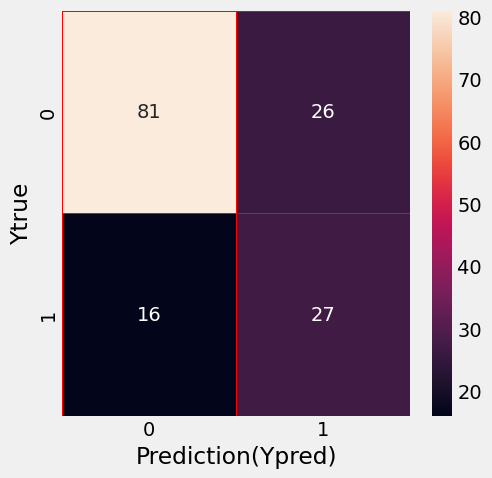

In [39]:
#Confusion Matrix

yprediciton5= DTC.predict(x_test)
ytrue = y_test

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediciton5)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

### Evaluation of Results

#### f1 Score Calculations

In [40]:
#F1-Score For Logistic Regression
from sklearn.metrics import f1_score
LRf1 = f1_score(ytrue, yprediciton1, average='weighted') 
LRf1

0.8584376214535561

In [41]:
#K-NN
KNNf1= f1_score(ytrue, yprediciton2, average='weighted') 
KNNf1

0.7449399717514125

In [42]:
#SVM
SVMf1=f1_score(ytrue, yprediciton3, average='weighted') 
SVMf1

0.84

In [43]:
#Decision Tree
DTf1=f1_score(ytrue, yprediciton5, average='weighted') 
DTf1

0.7277205882352942

### Result Visualization

In [44]:
scores=[LRscore,KNNscore,SVMscore,DTCscore]
AlgorthmsName=["Logistic Regression","K-NN","SVM","Decision Tree", "Random Forest","Gradient Boosting Machine"]

#create traces

trace1 = go.Scatter(
    x = AlgorthmsName,
    y= scores,
    name='Algortms Name',
    marker =dict(color='rgba(0,255,0,0.5)',
               line =dict(color='rgb(0,0,0)',width=2)),
                text=AlgorthmsName
)
data = [trace1]

layout = go.Layout(barmode = "group",
                  xaxis= dict(title= 'ML Algorithms',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Prediction Scores',ticklen= 5,zeroline= False))
fig = go.Figure(data = data, layout = layout)
iplot(fig)

### Scatter Plot For Comparasion of ML Algorithms Prediciton Scores (F1)

In [45]:
scoresf1=[LRf1,KNNf1,SVMf1,DTf1]
#create traces

trace1 = go.Scatter(
    x = AlgorthmsName,
    y= scoresf1,
    name='Algortms Name',
    marker =dict(color='rgba(225,126,0,0.5)',
               line =dict(color='rgb(0,0,0)',width=2)),
                text=AlgorthmsName
)
data = [trace1]

layout = go.Layout(barmode = "group", 
                  xaxis= dict(title= 'ML Algorithms',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Prediction Scores(F1)',ticklen= 5,zeroline= False))
fig = go.Figure(data = data, layout = layout)
iplot(fig)